In [1]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\samxf1995\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samxf1995\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\samxf1995\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samxf1995\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


C:\Anaconda\envs\mie451-assignment-sa\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Q1

In [2]:
#!unzip reviews.zip -d .

In [3]:
#Read in from pandas
hotelDf = pandas.read_csv('reviews.csv')
hotelDf.columns=['idNum','filePath','hotelName','reviewColumn','ratingScore','groundTruth']

In [4]:
columns=['idNum','filePath','hotelName','reviewColumn','ratingScore','groundTruth']
for i in range (2,3):
    review = str("reviews" + str(i) + ".csv")
    hotelDf = hotelDf.append(pandas.read_csv(review, names = columns ,  header = None))
for i in range (4,7):
    review = str("reviews" + str(i) + ".csv")
    hotelDf = hotelDf.append(pandas.read_csv(review, names = columns ,  header = None))

In [5]:
hotelDf

,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth
0,169097965,data2/ca/1102799/4191651/169347960.html,Lakeview Hecla Resort,Stayed here for one night on the Stay and Play...,4,positive
1,169347960,data2/ca/1102799/4191651/170010173.html,Lakeview Hecla Resort,we called the day we checked in to have mainte...,2,negative
2,170010173,data2/ca/1102799/4191651/170153756.html,Lakeview Hecla Resort,This was our first visit to Lakeview Resort. B...,4,positive
3,194637934,data2/ca/1102799/4191651/194738124.html,Lakeview Hecla Resort,Great place if you like outdoor winter activit...,5,positive
4,194738124,data2/ca/1102799/4191651/194846811.html,Lakeview Hecla Resort,Hecla Resort is a reasonably priced winter get...,5,positive
5,194846811,data2/ca/1102799/4191651/195002608.html,Lakeview Hecla Resort,Our initial impression was AWSOME! Check in wa...,3,negative
6,233228830,data2/ca/1102799/4191651/233293067.html,Lakeview Hecla Resort,We were there to attend a wedding. Quality I f...,4,positive
7,233293067,data2/ca/1102799/4191651/233638763.html,Lakeview Hecla Resort,The staff at Lakeview Hecla Resort is very fri...,5,positive
8,233638763,data2/ca/1102799/4191651/233975504.html,Lakeview Hecla Resort,We stayed at Lakeview Hecla for a wedding the ...,4,positive
9,233975504,data2/ca/1102799/4191651/234534534.html,Lakeview Hecla Resort,The site of the resort is lovely! It was great...,4,positive


In [6]:
hotelDf['filePath'].replace(regex = True, inplace=True, to_replace=r'\D', value=r' ')

In [7]:
hotelDf2= hotelDf[hotelDf['filePath'].str.contains('154948')]
hotelDf2 = hotelDf2[['hotelName','reviewColumn','ratingScore','groundTruth']]
hotelDf2 = hotelDf2.dropna(how='any', axis=0)

In [8]:
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pandas.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [9]:
hotelDfP = hotelDf2.loc[hotelDf2['groundTruth'] == 'positive']
hotelDfN = hotelDf2.loc[hotelDf2['groundTruth'] == 'negative']
reviews = hotelDf2['reviewColumn'].values
reviewsP = hotelDfP['reviewColumn'].values
reviewsN = hotelDfN['reviewColumn'].values

In [10]:
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])
reviewDFP = evalSentences(reviewsP, to_df=True, columns=['reviewCol','vader'])
reviewDFN = evalSentences(reviewsN, to_df=True, columns=['reviewCol','vader'])

100%|███████████████████████████████████████████████████████████████████████████████| 333/333 [00:01<00:00, 297.85it/s]


In [11]:
reviewDF.head(5)

,reviewCol,vader
0,The layout is extremely functional and astheti...,0.9678
1,This is the second time this summer we stayed ...,0.8263
2,"I really like this hotel, the decor is very mo...",0.9883
3,We went to Whistler for the first time at the ...,0.8550
4,Just returned from 8 days at Evolution. The pr...,0.9928


In [12]:
hotelDf3 = pandas.concat([hotelDf2,reviewDF['vader']], axis = 1, sort=False)

In [13]:
hotelNames = hotelDf3['hotelName'].unique()
hotelNames

array(['Evolution', nan, 'Stoney Creek Resort',
       'The Aspens by Peak to Green Accommodations',
       'Whistler Peak Lodge', 'Pan Pacific Whistler Mountainside',
       'Fairmont Chateau Whistler Resort',
       'Delta Hotels by Marriott Whistler Village Suites',
       'Wildwood Lodge On Blackcomb', 'The Westin Resort & Spa, Whistler',
       'Le Chamois', 'Coast Blackcomb Suites at Whistler',
       'Crystal Lodge Hotel', 'Executive Inn At Whistler Village',
       'Pinnacle Hotel Whistler', 'Summit Lodge Boutique Hotel',
       'Adara Hotel', 'The Listel Hotel Whistler',
       'Whistler Village Inn + Suites', 'Hilton Whistler Resort & Spa',
       'Rainbow Suites', 'Lost Lake Lodge', 'Aspens on Blackcomb',
       'Aava Whistler Hotel', 'Blackcomb Lodge', 'Legends',
       'Glaciers Reach', 'Tantalus Lodge', 'Sundial Boutique Hotel',
       'Mountainside Lodge', 'First Tracks Lodge',
       'Four Seasons Resort and Residences Whistler',
       'Mountain Side Hotel Whistler by 

In [14]:
def getHotelRank(df, measure):
    #Rank the hotel by ground truth rating score
    hotelRating = []
    for hotel in hotelNames:
        itemDf = df.loc[df['hotelName']==hotel]
        hotelRating.append([hotel,itemDf[measure].mean()])
    hotelRatingDfGt = pandas.DataFrame(hotelRating)
    hotelRatingDfGt.columns=['hotelName','avgRatingScore']
    hotelRatingDfGt = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0)
    return hotelRatingDfGt

In [15]:
hotelRatingDfGt = getHotelRank(hotelDf3,'ratingScore')

In [16]:
hotelRatingDfGt

,hotelName,avgRatingScore
37,Powders Edge,5.000000
36,Sunpath at Stoney Creek,5.000000
38,Nita Lake Lodge,4.840871
31,Four Seasons Resort and Residences Whistler,4.800000
30,First Tracks Lodge,4.754717
5,Pan Pacific Whistler Mountainside,4.686567
0,Evolution,4.675000
33,Pan Pacific Whistler Village Centre,4.648936
12,Crystal Lodge Hotel,4.636364
28,Sundial Boutique Hotel,4.633333


In [17]:
hotelRatingDfGt2 = getHotelRank(hotelDf3,'vader')

In [18]:
hotelRatingDfGt2

,hotelName,avgRatingScore
35,Whistler Luxury Condos,0.977933
21,Lost Lake Lodge,0.977600
37,Powders Edge,0.973100
36,Sunpath at Stoney Creek,0.971820
26,Glaciers Reach,0.970000
32,Mountain Side Hotel Whistler by Executive,0.969445
16,Adara Hotel,0.961600
38,Nita Lake Lodge,0.943729
29,Mountainside Lodge,0.932816
30,First Tracks Lodge,0.914377


They are different beacuse some hotels only have few reviews. posibility of large error.

# Q2

In [19]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf, reviewDF, k=500):
    reviews = reviewDF['reviewCol'].values
    
    stop = set(stopwords.words('english'))
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [20]:
topk, finaldf = dataFrameTransformation(hotelDf3, reviewDF, k=500)

In [21]:
def getTopK(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewColumn'):
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

In [22]:
topkGroundPos = getTopK(df=hotelDf3, k=50, label_value='positive')

In [23]:
topkGroundPos

[('whistler', 2352),
 ('great', 2257),
 ('village', 1649),
 ('would', 1246),
 ('nice', 1191),
 ('location', 1137),
 ('ski', 1116),
 ('good', 1108),
 ('stayed', 1077),
 ('one', 1024),
 ('service', 1020),
 ('well', 923),
 ('friendly', 915),
 ('lake', 868),
 ('also', 817),
 ('day', 810),
 ('hot', 791),
 ('pool', 787),
 ('clean', 759),
 ('time', 742),
 ('lodge', 736),
 ('helpful', 731),
 ('walk', 704),
 ('place', 680),
 ('area', 673),
 ('back', 670),
 ('comfortable', 666),
 ('night', 662),
 ('really', 652),
 ('free', 612),
 ('bed', 606),
 ('get', 601),
 ('tub', 588),
 ('breakfast', 580),
 ('view', 567),
 ('two', 566),
 ('suite', 565),
 ('could', 561),
 ('excellent', 546),
 ('parking', 543),
 ('right', 537),
 ('food', 496),
 ('kitchen', 491),
 ('like', 491),
 ('mountain', 486),
 ('beautiful', 484),
 ('restaurant', 479),
 ('everything', 478),
 ('shuttle', 470),
 ('small', 469)]

In [24]:
topkGroundNeg = getTopK(df=hotelDf3, k=50, label_value='negative')

In [25]:
topkGroundNeg

[('would', 208),
 ('whistler', 205),
 ('one', 199),
 ('good', 175),
 ('location', 169),
 ('night', 168),
 ('village', 158),
 ('great', 149),
 ('get', 147),
 ('nice', 145),
 ('pool', 135),
 ('service', 134),
 ('bed', 130),
 ('hot', 129),
 ('time', 125),
 ('like', 119),
 ('front', 116),
 ('day', 115),
 ('small', 114),
 ('stayed', 111),
 ('desk', 107),
 ('clean', 107),
 ('could', 107),
 ('parking', 106),
 ('also', 99),
 ('well', 97),
 ('ski', 97),
 ('two', 97),
 ('breakfast', 95),
 ('back', 90),
 ('tub', 84),
 ('check', 83),
 ('really', 80),
 ('walk', 77),
 ('free', 75),
 ('friendly', 75),
 ('bathroom', 74),
 ('even', 73),
 ('better', 73),
 ('door', 72),
 ('next', 70),
 ('got', 69),
 ('people', 69),
 ('place', 66),
 ('hilton', 66),
 ('floor', 64),
 ('first', 62),
 ('much', 62),
 ('bedroom', 61),
 ('kitchen', 60)]

YES, this village's name is one of the most frequent word, also words like good are both ranked high as well.

## NP

In [26]:
# This grammar is described in the paper by S. N. Kim,
# T. Baldwin, and M.-Y. Kan.
# Evaluating n-gram based evaluation metrics for automatic
# keyphrase extraction.
# Technical report, University of Melbourne, Melbourne 2010.
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

In [27]:
# Create phrase tree
tagger = PerceptronTagger()
pos_tag = tagger.tag
chunker = nltk.RegexpParser(grammar)
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopwords)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

In [28]:
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [29]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDf, reviewDF, k=50):
    reviews = reviewDF['reviewCol'].values
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [30]:
topk_phraseP, finaldf_phraseP = newDataFrameTransformation(hotelDfP,reviewDFP)
topk_phraseN, finaldf_phraseN = newDataFrameTransformation(hotelDfN,reviewDFN)

In [31]:
finaldf_phraseP = finaldf_phraseP.dropna(how='any', axis=0)
finaldf_phraseN = finaldf_phraseN.dropna(how='any', axis=0)

In [32]:
topk_phraseP

[('hot tub', 345),
 ('whistler villag', 276),
 ('nita lake lodg', 209),
 ('front desk', 167),
 ('minut walk', 128),
 ('bedroom suit', 118),
 ('great locat', 96),
 ('short walk', 87),
 ('great place', 79),
 ('nita lake', 75),
 ('first time', 69),
 ('main villag', 67),
 ('full kitchen', 62),
 ('hotel staff', 60),
 ('pool area', 57),
 ('great stay', 56),
 ('front desk staff', 51),
 ('nice touch', 49),
 ('great time', 47),
 ('great hotel', 46),
 ('ski lift', 46),
 ('pan pacif', 46),
 ('ski valet', 46),
 ('great view', 45),
 ('friendli staff', 42),
 ('upper villag', 42),
 ('min walk', 39),
 ('next time', 39),
 ('free shuttl', 39),
 ('good valu', 38),
 ('creeksid gondola', 38),
 ('whistler mountain', 38),
 ('room servic', 37),
 ('easi access', 37),
 ('summit lodg', 36),
 ('outdoor hot tub', 36),
 ('comfort bed', 36),
 ('blackcomb mountain', 35),
 ('night stay', 35),
 ('shuttl servic', 35),
 ('hotel room', 34),
 ('four season', 34),
 ('free wifi', 34),
 ('long day', 34),
 ('mountain view', 33

In [33]:
topk_phraseN

[('hot tub', 56),
 ('front desk', 44),
 ('great locat', 20),
 ('whistler villag', 16),
 ('front desk staff', 14),
 ('star hotel', 13),
 ('hotel room', 12),
 ('pool area', 11),
 ('custom servic', 10),
 ('bedroom suit', 9),
 ('short walk', 9),
 ('pan pacif', 8),
 ('sofa bed', 8),
 ('good valu', 8),
 ('live room', 8),
 ('first night', 7),
 ('night stay', 7),
 ('junior suit', 7),
 ('ski boot', 7),
 ('upper villag', 7),
 ('min walk', 6),
 ('good locat', 6),
 ('next morn', 6),
 ('first time', 6),
 ('minut walk', 6),
 ('free wifi', 6),
 ('good deal', 6),
 ('four season', 6),
 ('next door', 6),
 ('room key', 6),
 ('basic room', 6),
 ('groceri store', 5),
 ('king bed', 5),
 ('sever time', 5),
 ('hotel guest', 5),
 ('coast blackcomb suit', 5),
 ('main villag', 5),
 ('shuttl servic', 5),
 ('master bedroom', 5),
 ('staff member', 5),
 ('excel locat', 5),
 ('clean staff', 5),
 ('queen bed', 5),
 ('buffet breakfast', 4),
 ('ski season', 4),
 ('room servic', 4),
 ('good place', 4),
 ('ski resort', 4)

Phase are very similar for both good and back

Q3

In [34]:
finaldf = finaldf.dropna()

In [35]:
finaldf

,hotelName,ratingScore,groundTruth,reviewCol,vader,hotel,room,whistler,great,staff,...,offers,efficient,spend,along,pull,customer,helped,services,others,local
0,Evolution,5.0,positive,The layout is extremely functional and astheti...,0.9678,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Evolution,4.0,positive,This is the second time this summer we stayed ...,0.8263,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Evolution,5.0,positive,"I really like this hotel, the decor is very mo...",0.9883,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Evolution,5.0,positive,We went to Whistler for the first time at the ...,0.8550,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Evolution,5.0,positive,Just returned from 8 days at Evolution. The pr...,0.9928,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Evolution,5.0,positive,"We visited Whistler with our three children, a...",0.8459,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Evolution,5.0,positive,Evolution is located in Creekside which is a 5...,0.9627,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Evolution,5.0,positive,This hotel exceeded my expectations by far. We...,0.9646,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Evolution,5.0,positive,We stayed at the Evolution in Aug/12 Whistler ...,0.9477,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Evolution,4.0,positive,I've stayed at Evolution in the winter before ...,0.9583,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# get Top K mutual information terms from the dataframe
def getMI(topk, finaldf, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(finaldf[label_column], finaldf[word[0]])])
    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [37]:
miScoredf = getMI(topk, finaldf)

In [38]:
miScoredf.head(50)

,Word,MI Score
22,lake,0.007921
373,aava,0.006395
71,nita,0.005766
43,view,0.003817
61,restaurants,0.002860
28,lodge,0.002536
57,beautiful,0.002261
50,food,0.002180
24,clean,0.002048
251,part,0.001927


# Q3(b)

In [39]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(hotelDf,reviewDF)
miScoredfNP = getMI(topk_phrase, finaldf_phrase)

In [40]:
miScoredfNP.head(50)

,Word,MI Score
42,live room,0.018943
5,bedroom suit,0.018862
23,great view,0.018796
1,whistler villag,0.018790
6,great locat,0.018774
7,short walk,0.018762
8,great place,0.018759
40,sofa bed,0.018709
22,ski lift,0.018703
3,nita lake lodg,0.018697


# Q4

In [41]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1.0)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi



In [42]:
# Compute PMI for all terms and all possible labels

def pmiForAllCal(df, topk,label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [43]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf,topk)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:16<00:00, 30.36it/s]


In [44]:
pmiposlist.sort_values('pmi',ascending=0).head(20)

,word,pmi
473,aura,0.101400
71,nita,0.095084
425,patio,0.089999
22,lake,0.086493
270,pan,0.085896
289,pacific,0.084919
251,part,0.081576
236,reception,0.077447
448,inside,0.076927
451,kept,0.076394


In [45]:
pmineglist.sort_values('pmi',ascending=0).head(20)

,word,pmi
373,aava,1.282522
487,legends,0.553270
253,places,0.464266
436,central,0.463224
446,rental,0.453654
483,decor,0.442605
167,car,0.425995
449,impressed,0.414434
472,might,0.384581
180,value,0.381644


# 4B

In [46]:
pmiposlistNP, pmineglistNP, pmidfNP = pmiForAllCal(finaldf_phrase, topk=topk_phrase)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.59it/s]


In [47]:
pmiposlistNP.sort_values('pmi',ascending=0).head(20)

,word,pmi
42,live room,0.114144
23,great view,0.074058
40,sofa bed,0.064463
5,bedroom suit,0.055379
28,friendli staff,0.044452
25,good valu,0.043249
10,first time,0.037552
12,pool area,0.034297
20,ski valet,0.032257
14,front desk staff,0.032257


In [48]:
pmineglistNP.sort_values('pmi',ascending=0).head(20)

,word,pmi
41,outdoor hot tub,0.234947
44,creeksid gondola,0.222677
8,great place,0.220830
22,ski lift,0.213108
7,short walk,0.200522
9,nita lake,0.200204
6,great locat,0.184937
3,nita lake lodg,0.165246
1,whistler villag,0.141886
49,mountain view,0.136147


# 4C  

In [134]:
dftop=hotelDf3.loc[hotelDf3['hotelName'] == ('Nita Lake Lodge')]

In [135]:
dftop =

,hotelName,reviewColumn,ratingScore,groundTruth,vader
2692,Nita Lake Lodge,We stayed for 10 nights at Nita Lake Lodge and...,5.0,positive,0.9545
2693,Nita Lake Lodge,"What an amazing place, stayed here with my bro...",5.0,positive,0.9640
2694,Nita Lake Lodge,"We were in room 316,a corner room. I think it ...",5.0,positive,0.9307
2695,Nita Lake Lodge,I have been to Whistler 6 times now. I have st...,5.0,positive,0.9783
2696,Nita Lake Lodge,Nita Lake Lodge is a beautiful hotel in a beau...,5.0,positive,0.9905
2697,Nita Lake Lodge,we stayed at the Nita lake lodge for 2 days an...,5.0,positive,0.9447
2698,Nita Lake Lodge,It's a quiet hotel in Creekside before you arr...,4.0,positive,0.9412
2699,Nita Lake Lodge,Rooms are incredible with large bathrooms and ...,5.0,positive,0.9459
2700,Nita Lake Lodge,Our anniversary and this place treated us like...,5.0,positive,0.9985
2701,Nita Lake Lodge,This is a boutique hotel just at the trian sta...,4.0,positive,0.9872


In [ ]:
dftopfinal =

In [136]:
dfbot =hotelDf3.loc[hotelDf3['hotelName'] == ('Executive Inn At Whistler Village')]

In [137]:
dfbot

,hotelName,reviewColumn,ratingScore,groundTruth,vader
1021,Executive Inn At Whistler Village,Four nights over Xmas at the awkwardly titled ...,4.0,positive,0.9577
1022,Executive Inn At Whistler Village,"We were in the Mountainside, and location was ...",4.0,positive,0.4754
1023,Executive Inn At Whistler Village,The reason I am writing this review is because...,2.0,negative,0.9558
1024,Executive Inn At Whistler Village,Great location. Little tricky to find. Small h...,3.0,negative,0.7964
1025,Executive Inn At Whistler Village,Pictures on their Website must have been taken...,1.0,negative,0.9784
1026,Executive Inn At Whistler Village,"At first glance at the lobby, I was a bit worr...",4.0,positive,0.8996
1027,Executive Inn At Whistler Village,My wife and I visited this hotel for three nig...,3.0,negative,0.9787
1028,Executive Inn At Whistler Village,We had a choice of the Executive Inn Village s...,4.0,positive,0.3818
1029,Executive Inn At Whistler Village,My husband and I came here as a side trip from...,5.0,positive,0.9213
1030,Executive Inn At Whistler Village,Our room was nice and location good BUT...the ...,2.0,negative,0.9657


In [247]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def topdataFrameTransformation(hotelDf, reviewDF, k=500):
    reviews = reviewDF['reviewCol'].values
    
    stop = set(stopwords.words('english'))
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [248]:
topktop,finaldftop=topdataFrameTransformation(dftop, reviewDF, k=50)

In [249]:
pmiposlisttop, pmineglisttop, pmidftop = pmiForAllCal(finaldf,topktop)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 21.77it/s]


In [251]:
pmiposlisttop.sort_values('pmi',ascending=0).head(20)

,word,pmi
22,lake,0.086493
43,view,0.063179
28,lodge,0.053867
42,suite,0.047366
37,breakfast,0.030007
30,get,0.029484
32,bed,0.026697
34,area,0.020401
36,free,0.018443
21,also,0.016584


In [252]:
pmineglisttop.sort_values('pmi',ascending=0).head(20)

,word,pmi
24,clean,0.282816
35,comfortable,0.202738
13,ski,0.161843
9,location,0.134078
45,right,0.111517
47,excellent,0.110968
26,helpful,0.094538
20,hot,0.091660
16,well,0.076091
25,night,0.070278


In [254]:
botkbot,finaldfbot=topdataFrameTransformation(dfbot, reviewDF, k=50)
pmiposlistbot, pmineglistbot, pmidfbot = pmiForAllCal(finaldf,botkbot)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 22.21it/s]


In [255]:
pmineglistbot.sort_values('pmi',ascending=0).head(20)

,word,pmi
24,clean,0.282816
35,comfortable,0.202738
13,ski,0.161843
9,location,0.134078
45,right,0.111517
47,excellent,0.110968
26,helpful,0.094538
20,hot,0.091660
16,well,0.076091
25,night,0.070278


In [256]:
pmiposlistbot.sort_values('pmi',ascending=0).head(20)

,word,pmi
22,lake,0.086493
43,view,0.063179
28,lodge,0.053867
42,suite,0.047366
37,breakfast,0.030007
30,get,0.029484
32,bed,0.026697
34,area,0.020401
36,free,0.018443
21,also,0.016584


positive and negative are reversed for both list

# 5A

In [49]:
def getHistogram(measure, title):
    if measure=='both':
        x = [finaldf['ratingScore'].values/5]
        y = [finaldf['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(finaldf[measure].values)
        plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

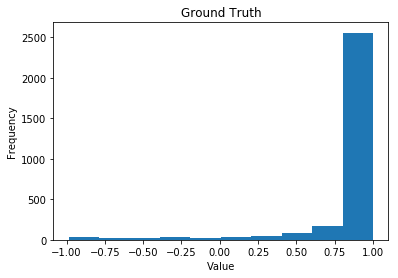

In [50]:
getHistogram('vader', 'Ground Truth')

In [51]:
hotelct = hotelDf3.groupby('hotelName').count()
hotelct = hotelct['reviewColumn']


In [52]:
hotelcount = pandas.merge(hotelct.to_frame(), hotelRatingDfGt, on='hotelName', how='inner')

In [71]:
hotelcount = hotelcount.sort_values('avgRatingScore',ascending=True)
hotelcount

,hotelName,reviewColumn,avgRatingScore
1,Adara Hotel,1,2.000000
17,Lost Lake Lodge,2,2.000000
35,Whistler Peak Lodge,5,2.400000
18,Mountain Side Hotel Whistler by Executive,11,3.363636
9,Executive Inn At Whistler Village,48,3.437500
2,Aspens on Blackcomb,37,3.567568
36,Whistler Village Inn + Suites,48,3.604167
3,Blackcomb Lodge,44,3.636364
37,Wildwood Lodge On Blackcomb,9,3.777778
30,Tantalus Lodge,26,3.884615


In [119]:
hotelcount2 = pandas.merge(hotelct.to_frame(), hotelRatingDfGt2, on='hotelName', how='inner')

In [121]:
hotelcount2 = hotelcount2.sort_values('avgRatingScore',ascending=True)

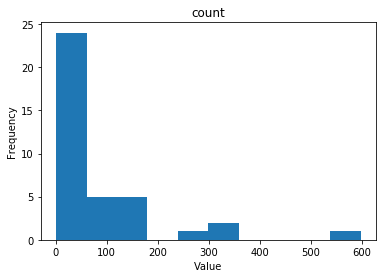

In [73]:
plt.hist(hotelcount['reviewColumn'].values)
plt.title('count')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# 5B

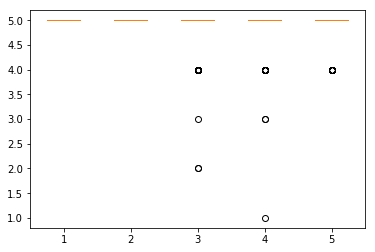

In [84]:
   #Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

hampton = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['ratingScore']
towneplace = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['ratingScore']
hiltonGarden = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['ratingScore']
homewood = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['ratingScore']
courtyard = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['ratingScore']

data = [hampton, towneplace, hiltonGarden, homewood, courtyard]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show() 

In [85]:
print(tp5gthotel.mean())
print(tp5gthotel.var())

avgRatingScore    4.879118
dtype: float64
avgRatingScore    0.013106
dtype: float64


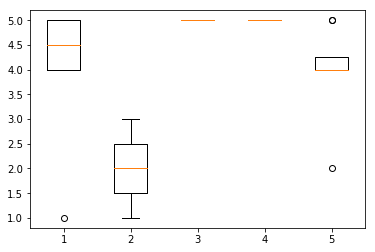

In [86]:
tp5gthotel = hotelRatingDfGt2.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

hampton = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['ratingScore']
towneplace = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['ratingScore']
hiltonGarden = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['ratingScore']
homewood = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['ratingScore']
courtyard = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['ratingScore']

data = [hampton, towneplace, hiltonGarden, homewood, courtyard]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show() 

In [87]:
print(tp5gthotel.mean())
print(tp5gthotel.var())

avgRatingScore    0.974091
dtype: float64
avgRatingScore    0.000012
dtype: float64


# 5C

Text(0.5, 0, 'Vader Score')

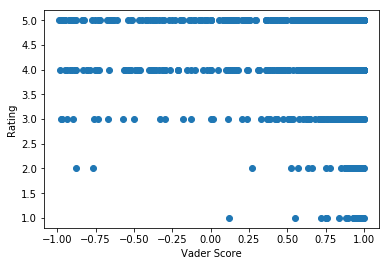

In [88]:
y = finaldf['ratingScore'].values
x = finaldf['vader'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

People prefer to give more postitive attuide enven if rating is not so high.

In [89]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

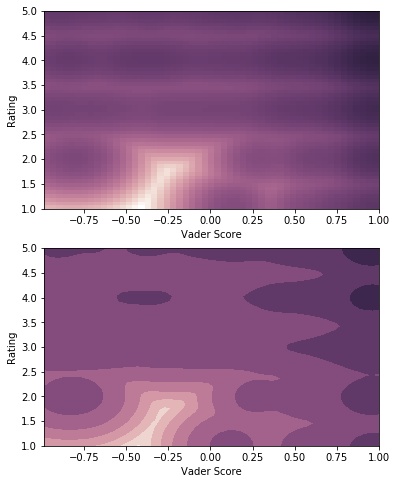

In [90]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

People in general like to give high ratings and good  sentiment reviews. low rating and bad atidude is rare.

In [91]:
finaldf

,hotelName,ratingScore,groundTruth,reviewCol,vader,hotel,room,whistler,great,staff,...,offers,efficient,spend,along,pull,customer,helped,services,others,local
0,Evolution,5.0,positive,The layout is extremely functional and astheti...,0.9678,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Evolution,4.0,positive,This is the second time this summer we stayed ...,0.8263,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Evolution,5.0,positive,"I really like this hotel, the decor is very mo...",0.9883,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Evolution,5.0,positive,We went to Whistler for the first time at the ...,0.8550,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Evolution,5.0,positive,Just returned from 8 days at Evolution. The pr...,0.9928,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Evolution,5.0,positive,"We visited Whistler with our three children, a...",0.8459,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Evolution,5.0,positive,Evolution is located in Creekside which is a 5...,0.9627,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Evolution,5.0,positive,This hotel exceeded my expectations by far. We...,0.9646,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Evolution,5.0,positive,We stayed at the Evolution in Aug/12 Whistler ...,0.9477,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Evolution,4.0,positive,I've stayed at Evolution in the winter before ...,0.9583,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
lengthlist = []
for review in finaldf['reviewCol'].values:
    num_words = len(review.split())
    lengthlist.append(num_words)
    num_words = 0
  

In [97]:
se = pandas.Series(lengthlist)

In [98]:
finaldf['lent'] = se.values

Text(0.5, 0, 'Vader Score')

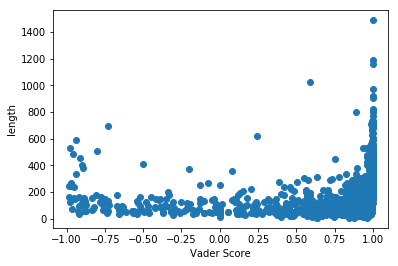

In [101]:
y = finaldf['lent'].values
x = finaldf['vader'].values
plt.plot(x, y,"o")
plt.ylabel('length')
plt.xlabel('Vader Score')

Text(0, 0.5, 'length')

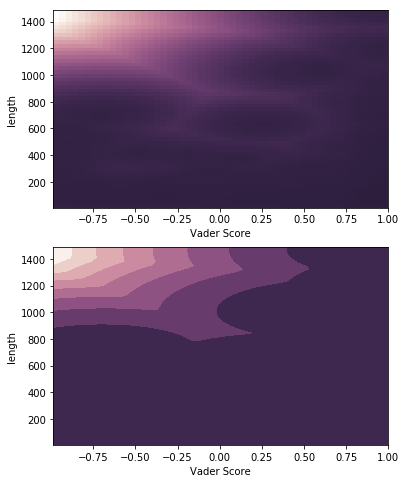

In [105]:
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('length')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('length')

Text(0.5, 0, 'ratingScore')

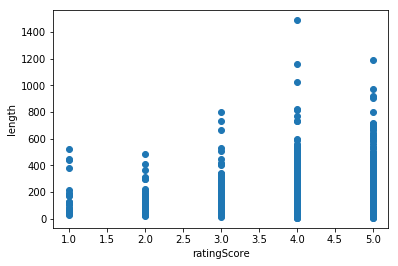

In [106]:
y = finaldf['lent'].values
x = finaldf['ratingScore'].values
plt.plot(x, y,"o")
plt.ylabel('length')
plt.xlabel('ratingScore')

Text(0, 0.5, 'length')

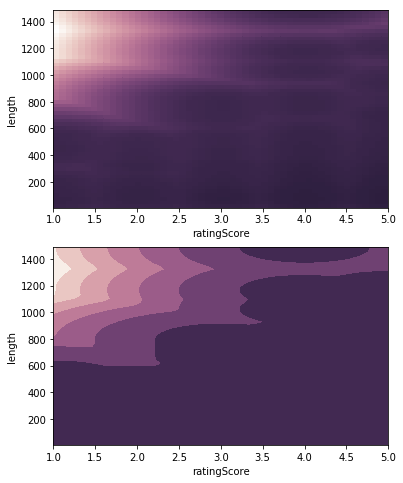

In [108]:
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('ratingScore')
ax1.set_ylabel('length')

ax2.set_xlabel('ratingScore')
ax2.set_ylabel('length')


Good reviews are usually longer

# 5CC

Text(0.5, 0, 'ratingScore')

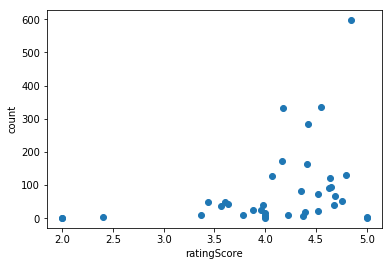

In [123]:
y = hotelcount['reviewColumn'].values
x = hotelcount['avgRatingScore'].values
plt.plot(x, y,"o")
plt.ylabel('count')
plt.xlabel('ratingScore')

Text(0, 0.5, 'length')

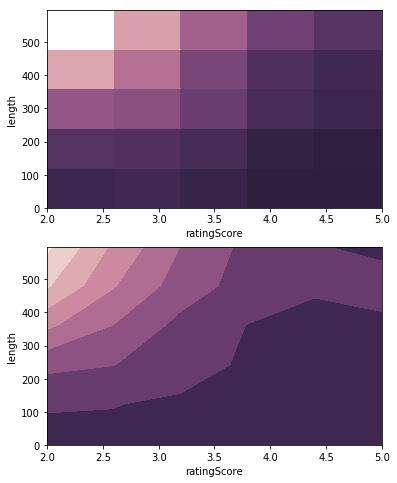

In [124]:
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('ratingScore')
ax1.set_ylabel('count')

ax2.set_xlabel('ratingScore')
ax2.set_ylabel('count')


Text(0.5, 0, 'vader')

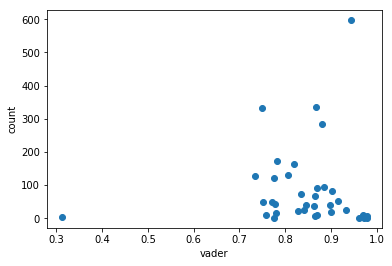

In [125]:
y = hotelcount2['reviewColumn'].values
x = hotelcount2['avgRatingScore'].values
plt.plot(x, y,"o")
plt.ylabel('count')
plt.xlabel('vader')

Text(0, 0.5, 'count')

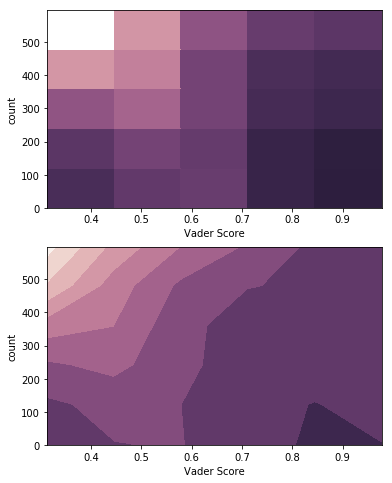

In [127]:
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('count')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('count')

in my case, hotels with more reviews usally have better rating as well.